# Behaviour analysis of bonsai VR

In [113]:
from aeon.io.reader import Csv, Reader
import aeon.io.api as aeon
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import importlib as imp
import parse_bonsai_functions
imp.reload(parse_bonsai_functions)

<module 'parse_bonsai_functions' from '/Users/athinaapostolelli/Documents/SWC/VR_ABCD_project/Bonsai_ABCD/parse_bonsai_functions.py'>

## Parse mouse and date info into root session folder

In [115]:
mouse_id = "013"
date = "20251125"
root = "/Volumes/mrsic_flogel/public/projects/SuKuSaRe_20250923_HFScohort3/rawdata/"
session_path = parse_bonsai_functions.find_base_path(mouse_id, date, root)

Found folder: /Volumes/mrsic_flogel/public/projects/SuKuSaRe_20250923_HFScohort3/rawdata/sub-013/ses-full031_date-20251125T122222


## Load all the relevant files
- settings (session and rig)
- events (odour phases)
- licks
- rewards
- position
- speed
- (analog data for precise timing)
- (optional cameras)

In [116]:
ses_settings, ses_rig_settings = parse_bonsai_functions.load_settings(session_path)

Save all event logs into pandas dataframe

In [117]:
sess_dataframe = parse_bonsai_functions.load_data(session_path)

Sanity check:

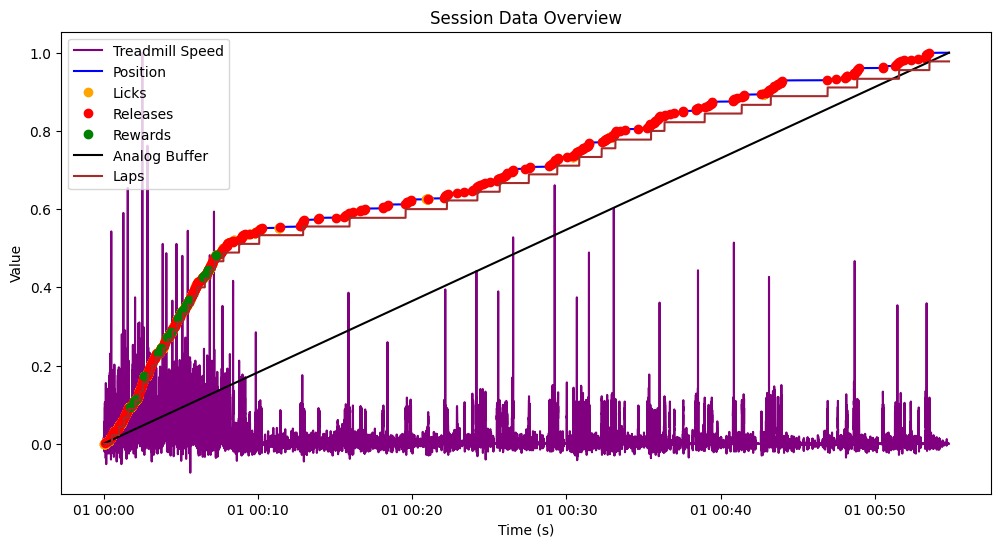

In [118]:
parse_bonsai_functions.plot_ethogram(sess_dataframe,ses_settings)

In [119]:
parse_bonsai_functions.print_sess_summary(sess_dataframe,ses_settings)

Session Summary:
Total Licks: 1825
Total Landmarks: 441
Total Rewards: 17
Hit Rate: 29.94%, False Alarm Rate: 16.29%, D-prime: 0.34
Targets Licked: 53 of 177, Distractors Licked: 43 of 264
rewarded odours: ['odour12' 'odour19' 'odour14' 'odour4'], rewarded textures: ['tiles' 'waves' 'logs' 'dark_squares']
non-rewarded odours: ['odour1' 'odour11' 'odour13' 'odour17' 'odour18' 'odour6'], non-rewarded textures: ['dots' 'grass' 'grating1' 'grating2' 'leaves' 'light_squares']


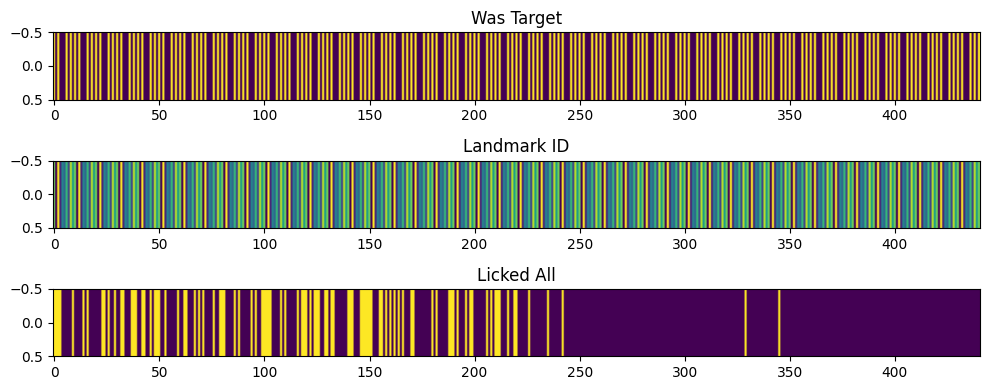

In [120]:
parse_bonsai_functions.plot_lick_lm(sess_dataframe,ses_settings)

## 2LM and 3LM training stages

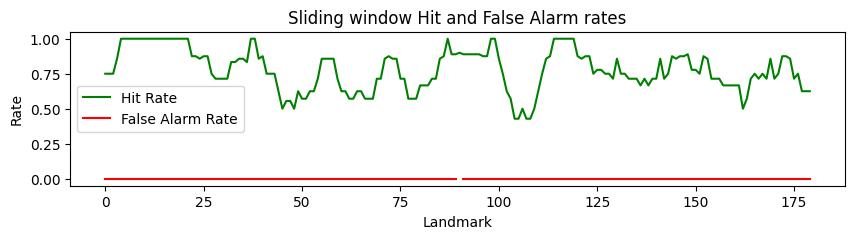

In [8]:
parse_bonsai_functions.plot_sw_hit_fa(sess_dataframe,ses_settings,window=10)

## Random world plots
For ABC sequencing for now

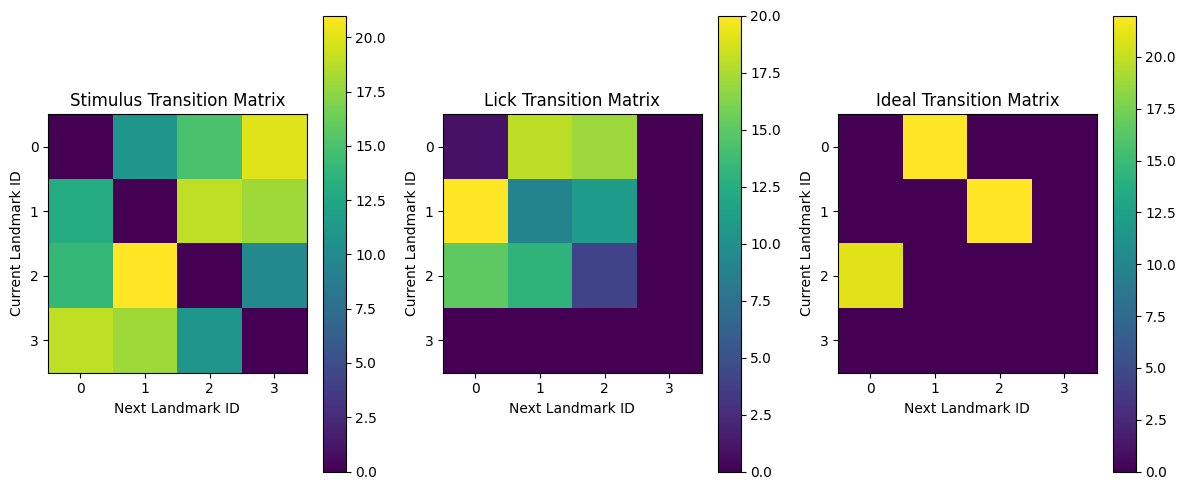

In [9]:
parse_bonsai_functions.plot_transition_matrix(sess_dataframe,ses_settings)

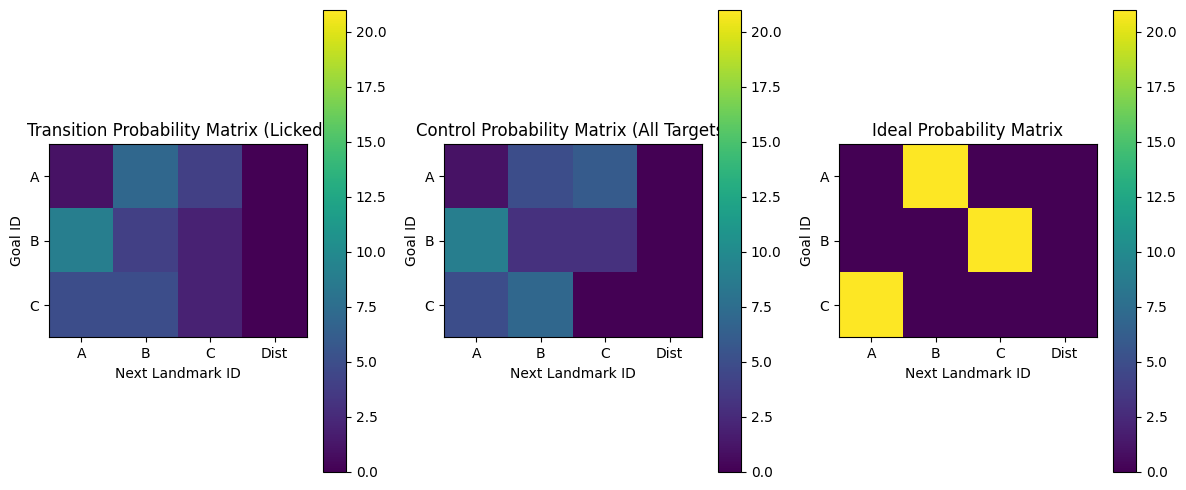

In [10]:
parse_bonsai_functions.plot_conditional_matrix(sess_dataframe,ses_settings)

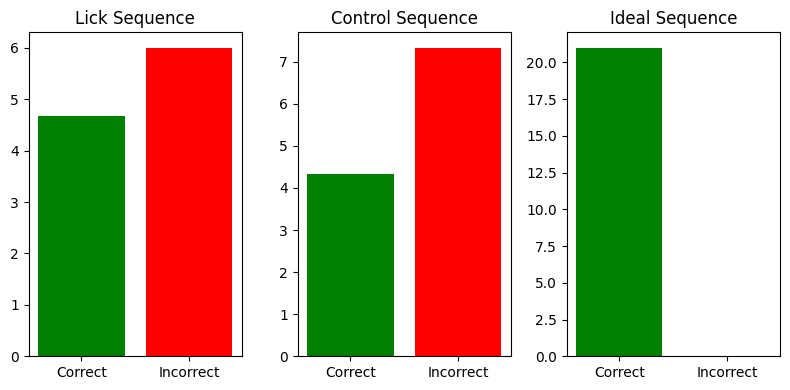

In [11]:
parse_bonsai_functions.plot_sequencing_ABC(sess_dataframe,ses_settings)

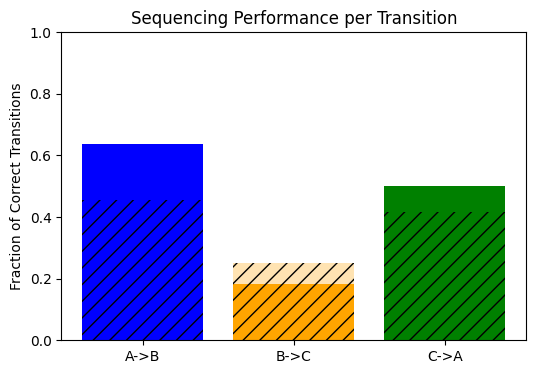

Sequencing Performance: 43.94%
Control Performance: 37.37%


0.4393939393939394

In [12]:
parse_bonsai_functions.plot_seq_fraction(sess_dataframe,ses_settings,test='control') 
# test can be 'transition' (actual performance) or 'control' (licked at all targets) or 'ideal' (licked perfectly in sequence)

## Stable world plots

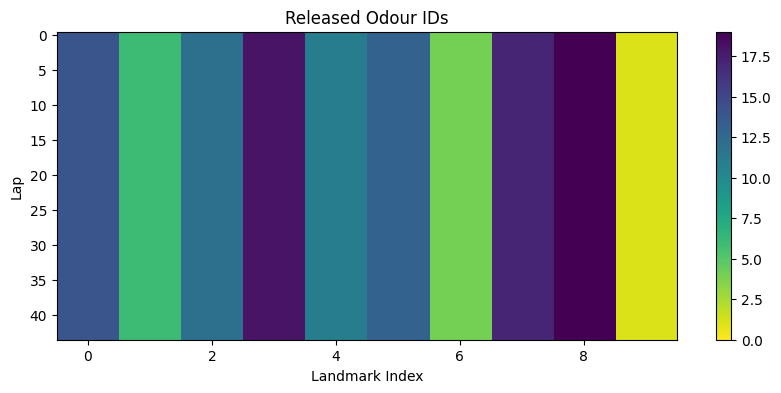

In [121]:
parse_bonsai_functions.sanity_check_parsing(sess_dataframe, ses_settings)

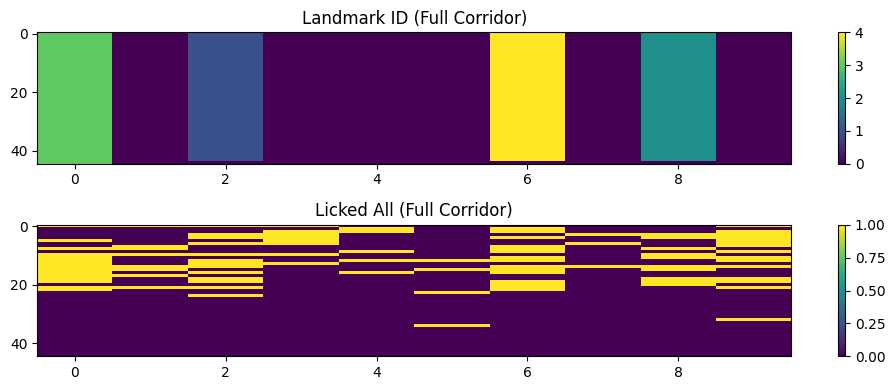

In [156]:
parse_bonsai_functions.plot_full_corr(sess_dataframe,ses_settings)

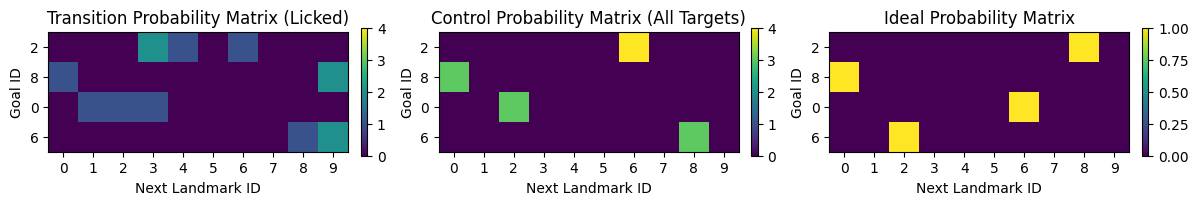

In [155]:
parse_bonsai_functions.plot_stable_conditional_matrix(sess_dataframe,ses_settings)

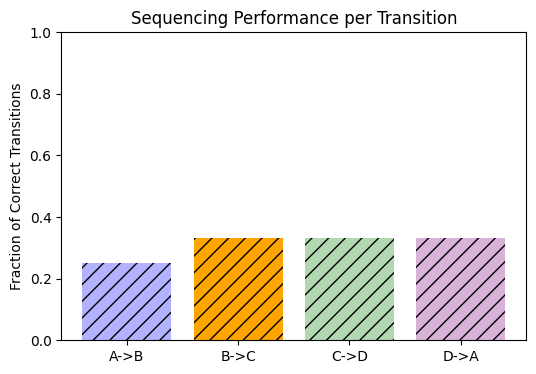

Sequencing Performance: 8.33%, (0.00%, 33.33%, 0.00%, 0.00%)
Control Performance: 31.25%, (25.00%, 33.33%, 33.33%, 33.33%)


In [ ]:
parse_bonsai_functions.plot_stable_seq_fraction_new(sess_dataframe,ses_settings)

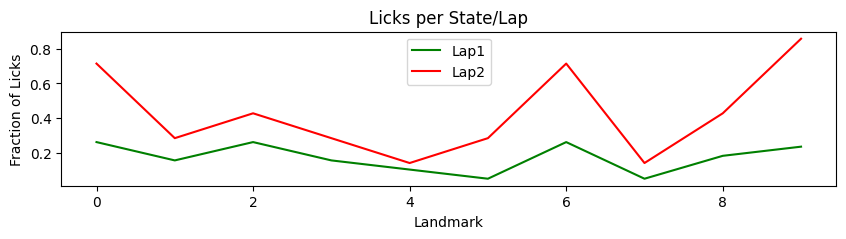

In [153]:
parse_bonsai_functions.plot_licks_per_state(sess_dataframe, ses_settings)

/Users/sandrareinert/Library/Mobile Documents/com~apple~CloudDocs/Documents/Postdoc_SWC/Code/Bonsai_ABCD/parse_bonsai_functions.py:1139: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  speed_per_lap = sess_dataframe['Treadmill'][lap_idx]
/Users/sandrareinert/Library/Mobile Documents/com~apple~CloudDocs/Documents/Postdoc_SWC/Code/Bonsai_ABCD/parse_bonsai_functions.py:1140: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lap_positions = sess_dataframe['Position'][lap_idx] - sess_dataframe['Position'][lap_idx].min()


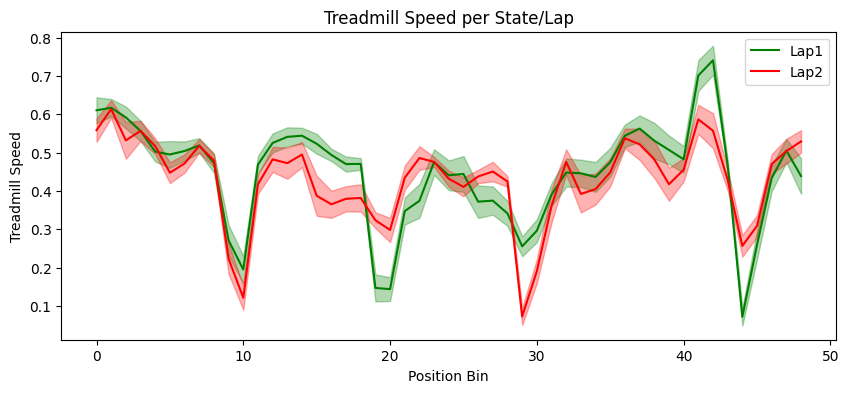

In [1190]:
parse_bonsai_functions.plot_speed_per_state(sess_dataframe, ses_settings)

Average Switch-Stay Ratio: 0.23


/Users/athinaapostolelli/Documents/SWC/VR_ABCD_project/Bonsai_ABCD/parse_bonsai_functions.py:1078: RuntimeWarning: Mean of empty slice
  sw_state_ratio_c = (state_diff_1[:,goals[2]]+state_diff_2[:,goals[2]])/2


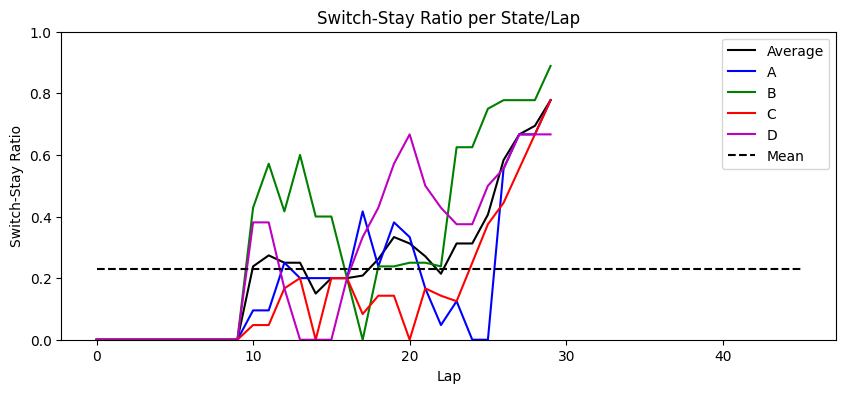

In [154]:
parse_bonsai_functions.plot_sw_state_ratio(sess_dataframe, ses_settings)